# Angular focal sweep

In [1]:
%load_ext autoreload

In [2]:
%autoreload 1

In [9]:
from __future__ import division, print_function
import os
import gc
import numpy as np
import h5py as hdf
from scipy.misc import imread, imsave
import pyzdde.zdde as py
import pyzdde.arraytrace as at
import matplotlib.pyplot as plt
from matplotlib.colorbar import make_axes
from IPython.core import display
from ipywidgets import interactive, interact, fixed  

# local modules
import iutils.plot.mplutils as mplu


In [4]:
#local module
%aimport geometric_model_zemax_commons
import geometric_model_zemax_commons as gm

In [5]:
%matplotlib inline
#%matplotlib notebook
#%matplotlib notebook

In [6]:
curDir = os.getcwd()

In [7]:
# Location of the Zemax lens files for this notebook
zmxdir = os.path.join(curDir, 'zmxfiles')
ln = pyz.createLink()

Could not initiate instance.


ERROR: Unable to establish a conversation with server (err=0x400aL).
ZEMAX may not be running!


**Index:**

* [Distortion plots using chief-ray intersects]

* [Image Simulation](#Image-simulation)

  * [Single paraxial thin lens - frontoparallel focal stack](#Single-paraxial-thin-lens---frontoparallel-focal-stack)
  
  * [Analysis of the fronto-parallel image stack data](#Analysis-of-the-fronto-parallel-image-stack-data)
  
  * [Paraxial double lens - angular sweep stack](#Paraxial-double-lens---angular-sweep-stack)

## Chief ray at IMG for lens tilts of a paraxial single lens with $m_p=1$ 

In [9]:
lens = "paraxialSingleLens24mmFiniteConj.zmx"
lensPath = os.path.join(zmxdir, lens)
ln.zLoadFile(lensPath)

0

In [9]:
ln.ipzGetLDE()

SURFACE DATA SUMMARY:

Surf     Type         Radius      Thickness                Glass      Diameter          Conic   Comment
 OBJ TILTSURF              -           1000                                500              -
   1 PARAXIAL              -              0                                 10              - Lens 1
 STO STANDARD       Infinity       24.59016                                 10              0 Stop
 IMA STANDARD       Infinity                                          12.29508              0


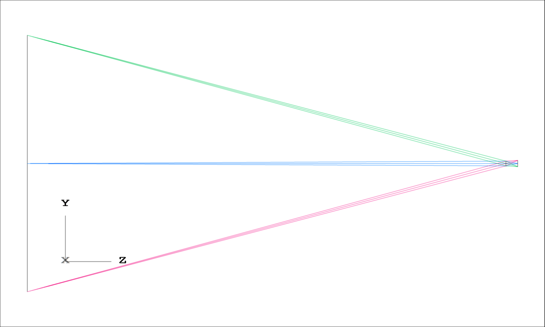

In [6]:
ln.ipzCaptureWindow('L3d')

In [45]:
# First order parameters
ln.ipzGetFirst()

Paraxial magnification : -0.02459016393
Real working F/#       : 2.509334897
Effective focal length : 24.0
Paraxial working F/#   : 2.459016393
Paraxial image height  : 6.147540984


In [8]:
# Pupil information
ln.ipzGetPupil()

Exit pupil position (from IMA)           : -24.59016393
Entrance pupil position (from surface 1) : 1.987846676e-13
Aperture Type                            : Float by stop
Apodization factor                       : 0.0
Apodization type                         : None
Value (stop surface semi-diameter)       : 5.0
Exit pupil diameter                      : 10.0
Entrance pupil diameter                  : 10.0


In [46]:
# A closer look at the lens with cardinals drawn
gm.draw_pupil_cardinal_planes(ln, firstDummySurfOff=40, push=True)

Textual information about the planes:

Exit pupil distance from IMG: -24.59016393
Entrance pupil from Surf 1 @ LDE: 40.0
Focal plane obj F from surf 1 @ LDE:  16.0 
Focal plane img F' from IMA:  -0.590164
Principal plane obj H from surf 1 @ LDE:  40.0 
Principal plane img H' from IMA:  -24.590164
Focal length:  24.0
Principal plane H to ENPP:  0.0
Principal plane H' to EXPP:  -7.00000022391e-08
Principal plane H' to EXPP (abs.) calc. using lens equ.:  0.0
Principal plane H' to rear focal plane:  24.0
Principal plane H to front focal plane:  -24.0

Check "Skip rays to this surface" under "Draw Tab" of the surface property for the dummy and cardinal plane surfaces. See Docstring Notes for details.


In [16]:
# After making the required changes to the surface properties (skip rays)
# in the Zemax main application window, the file with the new surfaces
# to show the position of the pupils and cardinal planes was saved as
# paraxialSingleLens24mmFiniteConj_cardinalsDrawn.zmx
# For drawing the figure, we can use a stored copy in order to avoid
# manually changing surface properties in the LDE again and again
loadStoredCopy = True
if loadStoredCopy:
    storedLens = "paraxialSingleLens24mmFiniteConj_cardinalsDrawn.zmx"
    storedLensPath = os.path.join(zmxdir, storedLens)
    ln.zLoadFile(storedLensPath)
else:
    ln.zGetRefresh()

In [11]:
#ln.push

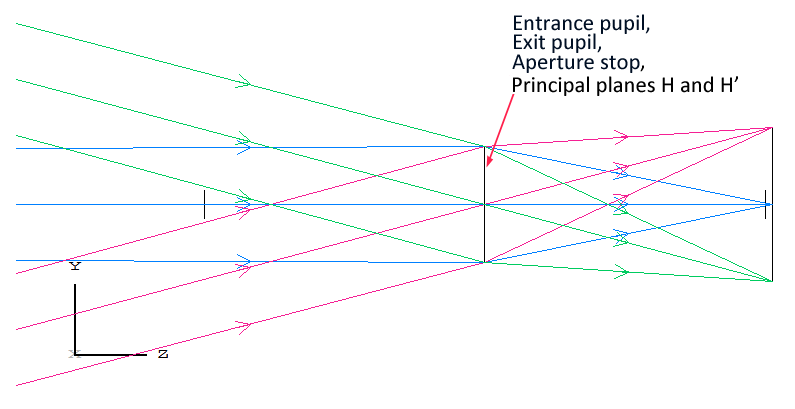

In [33]:
display.Image('images\paraSingle24mmFiniteConj_cardinalsDrawn_lay.png')

In [17]:
# Insert appropriate coordinate breaks to tilt the lens
cb1, cb2 = gm.insert_cbs_to_tilt_lens(ln, lastSurf=15, firstSurf=2, pivot='ENPP', push=True)
cb1, cb2

(3, 18)

Need to do the following:

1. In the main Zemax application, check the "Skip rays to this surface" for the two dummy surfaces just inserted -- one preceding the first CB and second following the second CB -- in the "Draw Tab" under surface properties.

2. Fix the semi-diameters of the ENPP and EXPP surfaces so that they don't change when the lens rotates.

3. Also ensure that the global reference surface is either the image plane or the untilted object plane.

In [18]:
loadStoredCopy = True
if loadStoredCopy:
    storedLens = "paraxialSingleLens24mmFiniteConj_cardinalsDrawnWdRotAbtENPP.zmx"
    storedLensPath = os.path.join(zmxdir, storedLens)
    ln.zLoadFile(storedLensPath)
else:
    ln.zGetRefresh()

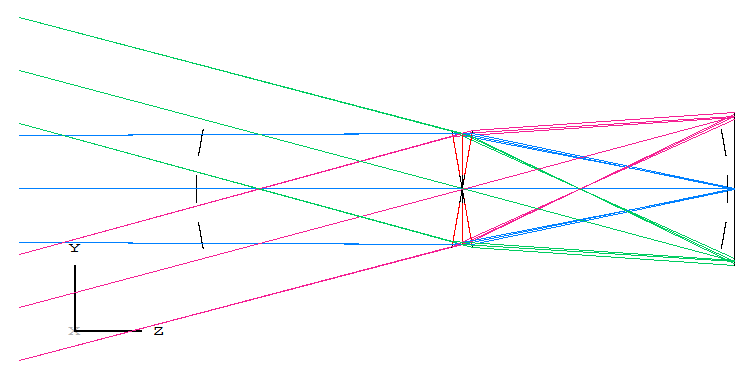

In [37]:
display.Image('images\paraSingle24mmFiniteConj_OverlayThreeLensTilts.png')

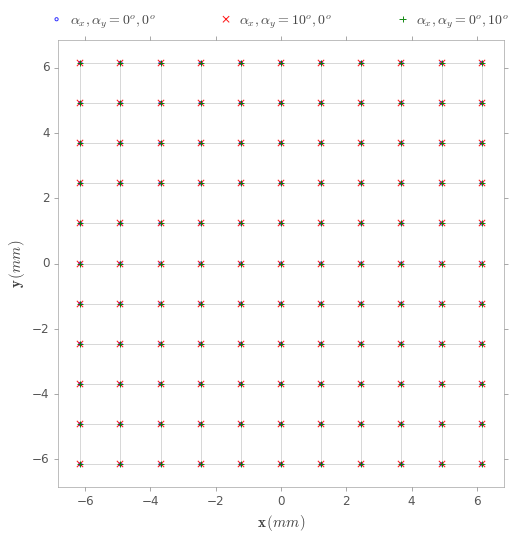

In [19]:
# plot of chief-ray intersects at the image plane
tiltXY = [(0,0), (10, 0), (0, 10)]
gm.plot_chiefray_intersects(ln, cb1, tiltXY, False)

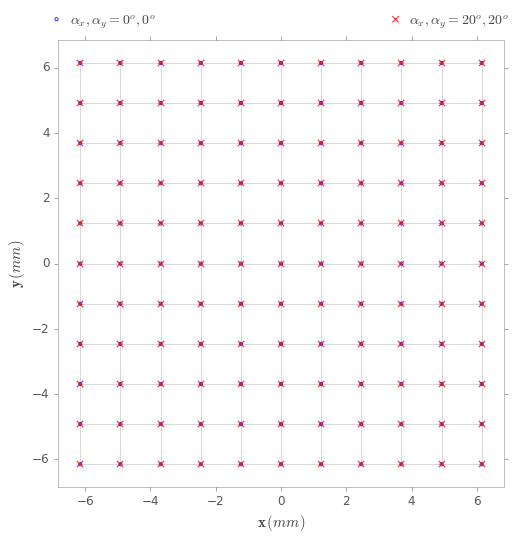

In [20]:
# plot of chief-ray intersects at the image plane for larger tilt angles
tiltXY = [(0,0), (20, 20)]
gm.plot_chiefray_intersects(ln, cb1, tiltXY, False)

## Chief ray at IMG for lens tilts of a paraxial two lens system with $m_p=1$ 

In [18]:
lens = "paraxialDoubleLens24mmFiniteConj.zmx"
lensPath = os.path.join(zmxdir, lens)
ln.zLoadFile(lensPath)

0

In [19]:
ln.ipzGetLDE()

SURFACE DATA SUMMARY:

Surf     Type         Radius      Thickness                Glass      Diameter          Conic   Comment
 OBJ TILTSURF              -           1000                           544.4728              -
   1 PARAXIAL              -       11.42857                           18.41689              - Lens 1
 STO STANDARD       Infinity       8.571429                           7.142857              0 Stop
   3 PARAXIAL              -       12.58065                           11.54889              - Lens 2
 IMA STANDARD       Infinity                                          13.17273              0


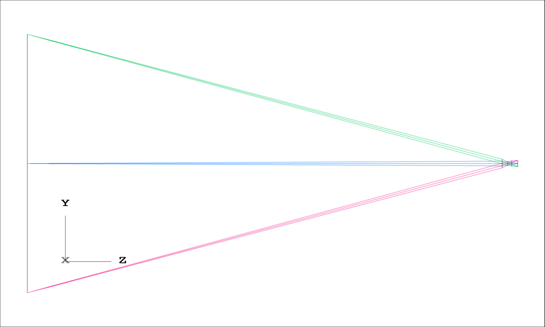

In [20]:
ln.ipzCaptureWindow('L3d')

In [21]:
# First order parameters
ln.ipzGetFirst()

Paraxial magnification : -0.02419354839
Real working F/#       : 2.508402114
Effective focal length : 24.0
Paraxial working F/#   : 2.458064516
Paraxial image height  : 6.58636402


In [22]:
# Pupil information
ln.ipzGetPupil()

Exit pupil position (from IMA)           : -24.58064516
Entrance pupil position (from surface 1) : 16.0
Aperture Type                            : Float by stop
Apodization factor                       : 0.0
Apodization type                         : None
Value (stop surface semi-diameter)       : 3.571428571
Exit pupil diameter                      : 10.0
Entrance pupil diameter                  : 10.0


In [23]:
# A closer look at the lens with cardinals drawn
gm.draw_pupil_cardinal_planes(ln, firstDummySurfOff=40, push=True)

Textual information about the planes:

Exit pupil distance from IMG: -24.58064516
Entrance pupil from Surf 1 @ LDE: 56.0
Focal plane obj F from surf 1 @ LDE:  32.0 
Focal plane img F' from IMA:  -0.580645
Principal plane obj H from surf 1 @ LDE:  56.0 
Principal plane img H' from IMA:  -24.580645
Focal length:  24.0
Principal plane H to ENPP:  0.0
Principal plane H' to EXPP:  1.59999999028e-07
Principal plane H' to EXPP (abs.) calc. using lens equ.:  0.0
Principal plane H' to rear focal plane:  24.0
Principal plane H to front focal plane:  -24.0

Check "Skip rays to this surface" under "Draw Tab" of the surface property for the dummy and cardinal plane surfaces. See Docstring Notes for details.


In [24]:
# After making the required changes to the surface properties (skip rays)
# in the Zemax main application window, the file with the new surfaces
# to show the position of the pupils and cardinal planes was saved as
# paraxialDoubleLens24mmFiniteConj_mp1_cardinalsDrawn.zmx
# For drawing the figure, we can use a stored copy in order to avoid
# manually changing surface properties in the LDE again and again
loadStoredCopy = True
if loadStoredCopy:
    storedLens = "paraxialDoubleLens24mmFiniteConj_mp1_cardinalsDrawn.zmx"
    storedLensPath = os.path.join(zmxdir, storedLens)
    ln.zLoadFile(storedLensPath)
else:
    ln.zGetRefresh()

In [25]:
#ln.push

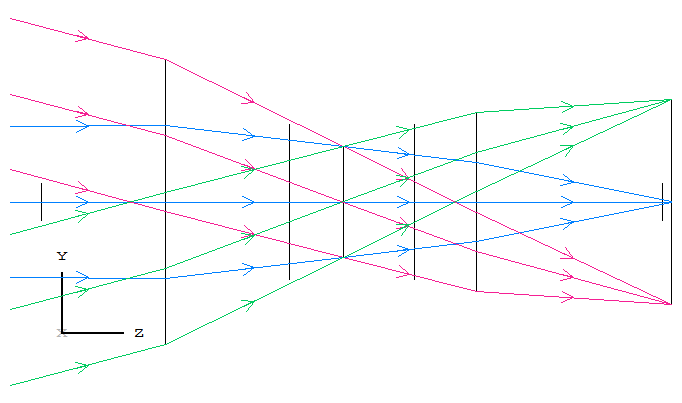

In [35]:
display.Image('images\paraDoubleLens24mmMp1FiniteConj_cardinalsDrawn_lay.png')

In [27]:
# Insert appropriate coordinate breaks to tilt the lens
cb1, cb2 = gm.insert_cbs_to_tilt_lens(ln, lastSurf=16, firstSurf=2, pivot='ENPP', push=True)
cb1, cb2

(3, 19)

As before, we need to do the following:

1. In the main Zemax application, check the "Skip rays to this surface" for the two dummy surfaces just inserted -- one preceding the first CB and second following the second CB -- in the "Draw Tab" under surface properties.

2. Fix the semi-diameters of the ENPP and EXPP surfaces so that they don't change when the lens rotates.

3. Also ensure that the global reference surface is either the image plane or the untilted object plane.

In [28]:
# The above file, after setting the dummy surface to "skip rays", was saved as 
# paraxialDoubleLens24mmFiniteConj_mp1_cardinalsDrawnWdRotAbtENPP.zmx
loadStoredCopy = True
if loadStoredCopy:
    storedLens = "paraxialDoubleLens24mmFiniteConj_mp1_cardinalsDrawnWdRotAbtENPP.zmx"
    storedLensPath = os.path.join(zmxdir, storedLens)
    ln.zLoadFile(storedLensPath)
else:
    ln.zGetRefresh()

The following line drawing figure shows only the chief rays from the three field points for three tilt positions of the lens about the ENPP (identified by the red lines). The rays are colored by configuration number.

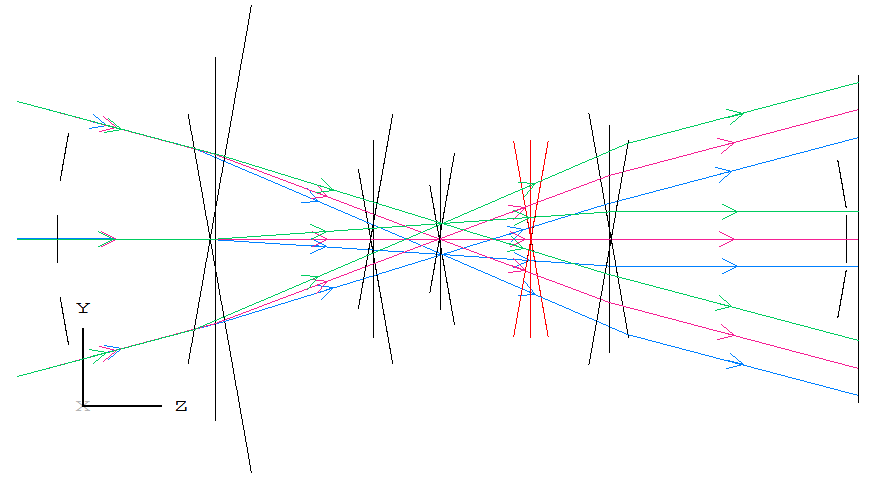

In [36]:
display.Image('images\paraDouble24mmMp1FiniteConj_OverlayThreeLensTilts.png')

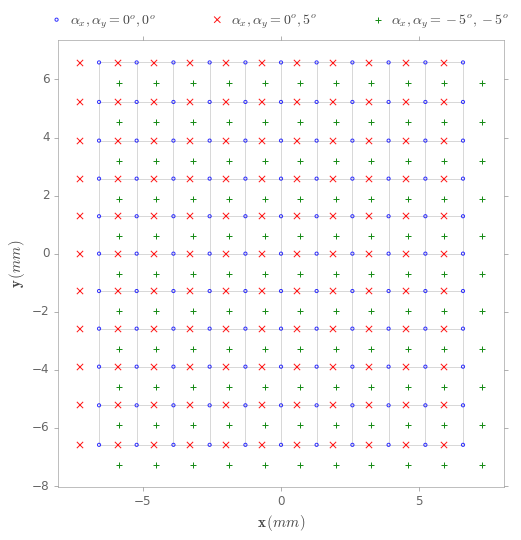

In [30]:
# plot of chief-ray intersects at the image plane
tiltXY = [(0,0), (0, 5), (-5, -5)]
gm.plot_chiefray_intersects(ln, cb1, tiltXY, False)

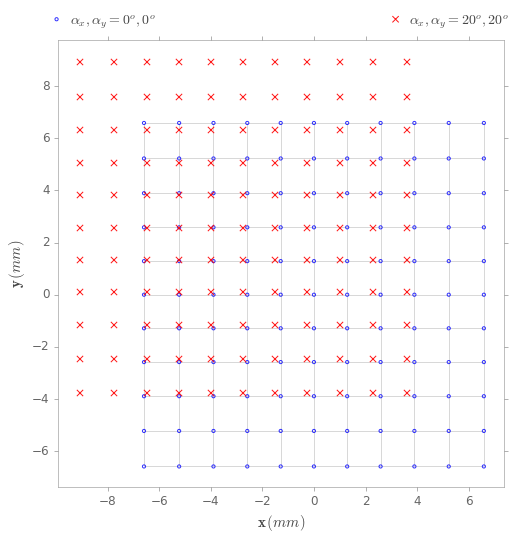

In [31]:
# plot of chief-ray intersects at the image plane for larger tilt angles
tiltXY = [(0,0), (20, 20)]
gm.plot_chiefray_intersects(ln, cb1, tiltXY, False)

In [21]:
ln.zNewLens()
ln.zPushLens(1)

0

## Image simulation

### Single paraxial thin lens - frontoparallel focal stack

In [8]:
loadStoredCopy = True
if loadStoredCopy:
    storedLens = "paraxialSingleLens24mmFiniteConj_cardinalsDrawnWdRotAbtENPP.zmx"
    storedLensPath = os.path.join(zmxdir, storedLens)
    ln.zLoadFile(storedLensPath)
else:
    ln.zGetRefresh()

In [9]:
ln.push

0

In [10]:
ln.ipzGetLDE()

SURFACE DATA SUMMARY:

Surf     Type         Radius      Thickness                Glass      Diameter          Conic   Comment
 OBJ TILTSURF              -            960                                500              -
   1 STANDARD       Infinity             40                                  0              0 dummy 2 c rays
   2 STANDARD       Infinity              0                                  0              0 Move to ENPP
   3 COORDBRK              -              0                                  -              - Lens tilt CB
   4 STANDARD       Infinity              0                                  0              0 dummy
   5 STANDARD       Infinity              0                                2.4              0 H
   6 STANDARD       Infinity            -24                                  0              0 dummy
   7 STANDARD       Infinity             24                                2.4              0 F
   8 STANDARD       Infinity              0                     

#### Determine appropriate parameters for image simulation

The parameters that we need to determine for a proper* image simulation are the following:

1. Field height of the source image.
2. Oversampling factor (if any required.)
3. Pupil sampling.
4. Image sampling.
5. Detector pixel size.
6. Detector x-pixels and y-pixels. 

\* *an image simulation that is adequately representative of the real.*

We will insert a Zernike Standard Phase surface co-located with the exit pupil (in the LDE, its position is just before the exit pupil surface with zero thickness) before we proceed. The Zernike Standard Phase surface will serve two main purpose:

* We can systematically introduce aberrations to the baseline diffraction limited system to make the simulation more realistic.

* Introducing small amount of aberration increases the size of the optical PSF. This helps in several different ways in the image simulation --

    * If the PSFs are really small, we will typically very small pixel size in order to properly represent the sampled PSF. This in turn, means that we will either have to set the object field height to be very small and/or use oversampling. 
    
    

In [11]:
for i in range(ln.zGetNumSurf()):
    if ln.zGetComment(i) == 'EXPP':
        break
print('Exit pupil surface number is:', i)

Exit pupil surface number is: 13


In [12]:
# Insert Zernike surface at the EX
zernSurfNum = i  # the new position of the EXPP surface will be i+1
ln.zInsertSurface(surfNum=zernSurfNum)
ln.zSetSurfaceData(surfNum=zernSurfNum, code=ln.SDAT_TYPE, value='SZERNPHA')

'SZERNPHA'

In [13]:
#ln.push

In [14]:
# Set Zernike surface's initial properties
maxTermCol = 1
maxTerm = 11  # upto primary spherical aberration
normRadiusCol = 2
normRadius = ln.zGetPupil().EXPD/2
priSphCol = 2 + 11   # 2 cols for maxTerm and normRadius plus 11th zernike term

ln.zSetExtra(zernSurfNum, maxTermCol, maxTerm)
ln.zSetExtra(zernSurfNum, normRadiusCol, normRadius)
# we will set the aberration terms later

5.0

Extract source image data and estimate simulation parameters

In [15]:
# source bitmap image is assumed to be in the IMAFiles folder
usr = os.path.expandvars("%userprofile%")
IMAdir = os.path.join(usr, 'Documents\Zemax\IMAFiles')
image = 'king.jpg'
imgfilename = os.path.join(IMAdir, image)
imgfilename

'C:\\Users\\Indranil\\Documents\\Zemax\\IMAFiles\\king.jpg'

In [16]:
ypix, xpix, _ = imread(imgfilename).shape
ypix, xpix

(1010L, 656L)

In [17]:
imgDelta = gm.get_image_plane_shifts(nearObj=800, farObj=1200, fl=24, num=3)

In [16]:
# Create a grid of dots image to examine the image side PSF
#gridofdots = gm.grid_of_square_dots(pixx=xpix, pixy=ypix, numx=1, numy=1, size=1)
#godImageFileName = 'imgsim_god.png'
#filename = os.path.join(IMAdir, godImageFileName)
#imsave(name=filename, arr=gridofdots)

**<font color='red'>SKIP</font>**

In [17]:
# skip

# the minimum spot at best focus should determine the "Field Height" 
# based on a criterion of certain number of pixels per spot. The 
# maximum spot size should determine the "Image Sampling" parameter
minObjPSF, maxObjPSF = gm.get_min_max_PSF_size(ln, imgDelta, frac=0.85)
minObjPSF, maxObjPSF # units is microns

(139.46285226664529, 2090.8375543330048)

In [18]:
# skip

# diameter of the minimum spot size in image space (microns)
minObjPSF*abs(ln.zGetMagnification())

3.4294144000000002

In [19]:
# skip

# diffraction limited spot size in the image space (microns)
2.44*ln.zGetWave(1).wavelength*ln.zGetFirst().realWorkFNum

3.367527431774

In [20]:
# skip

# with the current lens, what is the maximum  height of the object
# if we desire to have around 6 pixels per PSF
h = gm.obj_field_height(ppp=6, ypix=ypix, minSpotDia=minObjPSF/1000)
h 

23.476246798218625

In [21]:
# skip

# with the above field height, what is the size of detector pixel
detPixSize = ((h/1000)*abs(ln.zGetMagnification())) 
detPixSize*1000 # microns

0.5772847573333334

With the current lens, the maximum height of the object is 24 mm and the detector pixel size is 0.6 microns. However, in real playing cards are about 89 mm in height and sensor pixel sizes are slightly more than a micron. 


In [22]:
# introduce some amount of spherical aberrations to the lens (using the extra data editor)
ln.zSetExtra(zernSurfNum, priSphCol, 0.126)

0.126

In [23]:
#ln.push

In [24]:
# estimation of psf spot size based on aberrations
minObjPSF, maxObjPSF = gm.get_min_max_PSF_size(ln, imgDelta, frac=0.85)
minObjPSF, maxObjPSF # units is microns

(451.06516530676026, 1826.4981933337201)

In [25]:
# with the current lens, what is the maximum 
h = gm.obj_field_height(ppp=5, ypix=ypix, minSpotDia=minObjPSF/1000)
h

91.115163391965581

In [26]:
# diameter of the minimum spot size in image space (microns)
minObjPSF*abs(ln.zGetMagnification())

11.091766359999999

In [27]:
#ln.push

In [28]:
# setting height to 89 mm
h = 89.0
detPixSize = ((h/1000)*abs(ln.zGetMagnification())) 
detPixSize*1000 # microns

2.18852459016348

In [29]:
gm.image_sampling(h=h, ypix=ypix, maxSpotDia=maxObjPSF/1000)

20

In [30]:
detDat = gm.get_detector_settings(h=h, xpix=xpix, ypix=ypix, fl=24, xfield=70, umid=1000, unear=800)
detPixelSize, detXPixels, detYPixels = detDat
detPixelSize, detXPixels, detYPixels

(0.0021668560298652812, 2853, 1330)

 **<font color='red'>START HERE AGAIN </font>**

Now call the image simulation code

In [18]:
h = 89.0
ln.zSetExtra(zernSurfNum, priSphCol, 0.126)
detPixelSize, detXPixels, detYPixels = 0.0021668560298652812, 2853, 1330

In [19]:
# also set visible wavelengths before the simulation

# Think/choice
# may be we just send a tuple of wavelengths to the function `focal_stack_fronto_parallel()` so 
# that image simulation is done for each color channel (along with the particular wavelength dependent 
# zernike coefficients) 

In [20]:
# transmit Zernike coefficients for (wavelength, field ) pairs, and the zernike surface number

In [26]:
 ln.push

0

In [29]:
# In the setup of the lens, it is expected that the first surface in the LDE (OBJ or 
# surfNum=0) is the object surface, following which is the dummy surface for rendering 
# incoming rays close to the lens (in physical space). Therefore the PHYSICAL distance
# between the object surface and the vertex of the lens' left most surface is equal to
# the thickness of the OBJ surface and the dummy surface in the LDE.

# In this particular experiment the thickness of the dummy surface was 40 mm
# 

# Settings for every composed image frame with object at 3 different depths 
# from the lens
dummySurfThick = 40
objsurfthick = [1000-dummySurfThick, 800-dummySurfThick, 1200-dummySurfThick] 
objarr = ['king.jpg', 'queen.jpg', 'jack.jpg']
fldarr = [1, 4, 5]


# settings for generation of the focal-sweep stack of images
focalLength = 24
numOfImagesInStack = 3 #10

# function to generate the range of shifts of the image plane along the optical 
# axis relative to the base position (position at which the middle object is
# in geometrical focus)
imgDelta = gm.get_image_plane_shifts(nearObj=800, farObj=1200, fl=focalLength, 
                                     num=numOfImagesInStack) #[-1]
if not isinstance(imgDelta, list):
    imgDelta = list((imgDelta,))


# function to generate the image stack and store in an HDF5 container

# arguments to the function zSetImageSimulationsSettings()

X2, X4, X8, X16, X32 = 1, 2, 3, 4, 5  # oversampling
RGB = 0                               # Wavelength
NOAB, GEOM, DIFF = 0, 1, 2            # Aberration
S32by32, S64by64 = 1, 2               # Pupil/Image Sampling
CHIEF, VERTEX = 0, 1                  # reference
SIMIMG, SRCBMP, PSFGRID = 0, 1, 2     # show as 

hdffileFull = gm.focal_stack_fronto_parallel(ln, imgDelta=imgDelta, 
                                             objsurfthick=objsurfthick, 
                                             objarr=objarr, fldarr=fldarr, 
                                             objht=h, over=0, 
                                             pupsam=S32by32, imgsam=S32by32, 
                                             psfx=1, psfy=1, 
                                             pixsize=detPixelSize, 
                                             xpix=detXPixels, ypix=detYPixels, 
                                             timeout=240, verbose=True)


os.path.split(hdffileFull)[-1]

Time: 0:00:00. Starting image simulation for delta = -0.1004
Time: 0:03:26. Image sim of data type img for obj king.jpg for obj thick 960.00 completed!
Time: 0:07:03. Image sim of data type img for obj queen.jpg for obj thick 760.00 completed!
Time: 0:10:25. Image sim of data type img for obj jack.jpg for obj thick 1160.00 completed!
Time: 0:14:20. Image sim of data type img for obj imgsim_god.png for obj thick 960.00 completed!
Time: 0:18:19. Image sim of data type img for obj imgsim_god.png for obj thick 760.00 completed!
Time: 0:21:59. Image sim of data type img for obj imgsim_god.png for obj thick 1160.00 completed!
Tracing for chief-ray intersects...
Time: 0:21:59. Starting image simulation for delta = 0.0000
Time: 0:25:23. Image sim of data type img for obj king.jpg for obj thick 960.00 completed!
Time: 0:28:58. Image sim of data type img for obj queen.jpg for obj thick 760.00 completed!
Time: 0:32:22. Image sim of data type img for obj jack.jpg for obj thick 1160.00 completed!
T

'fronto_para_focal_stack_2016_01_07_00_51.hdf5'

0

### Analysis of the fronto-parallel image stack data

In [48]:
def get_hdf5files_list():
    imgdir = os.path.join(os.getcwd(), 'data', 'imgstack')
    return [f for f in os.listdir(imgdir) if f.endswith('.hdf5')]

def show_image_stack(hdffile, i):
    fig, ax = plt.subplots(1, 1, figsize=(14, 10))
    with hdf.File(hdffile, 'r') as f:
        dgrp = f['data/'+'{}'.format(i).zfill(3)]
        dsetImg = f['data/'+'{}'.format(i).zfill(3)+'/image']
        ax.imshow(dsetImg[...], interpolation='none')
        print('Magnifications:', dgrp.attrs['mag'])
        plt.show()
    
def show_psf_stack(hdffile, i):
    fig, ax = plt.subplots(1, 1, figsize=(14, 10))
    with hdf.File(hdffile, 'r') as f:
        dgrp = f['data/'+'{}'.format(i).zfill(3)]
        dsetPsf = f['data/'+'{}'.format(i).zfill(3)+'/psf']
        ax.imshow(dsetPsf[...], interpolation='none')
        print('Magnifications:', dgrp.attrs['mag'])
        plt.show()
    
def show_cr_img_inter_stack(hdffile, i):
    fig, ax = plt.subplots(1, 1, figsize=(14, 10))
    with hdf.File(hdffile, 'r') as f:
        dgrp = f['data/'+'{}'.format(i).zfill(3)]
        x = f['data/'+'{}'.format(i).zfill(3)+'/cr_img_ipts/x']
        y = f['data/'+'{}'.format(i).zfill(3)+'/cr_img_ipts/y']
        ax.scatter(x[...], y[...], s=10, facecolors='none', 
                       edgecolors='r', alpha=0.8, zorder=12)
        print('Magnifications:', dgrp.attrs['mag'])
        plt.show()
    
def show_stack(hdffile, what):
    global iSelect
    if iSelect:
        iSelect.close()
    imgdir = os.path.join(os.getcwd(), 'data', 'imgstack')
    hdffile = os.path.join(imgdir, hdffile)
    with hdf.File(hdffile, 'r') as f:
        stackLen = len(f['data'])
        iSelect = widgets.IntSlider(value=0, 
                                    min=0, 
                                    max=stackLen-1, 
                                    step=1, description='ImageNum', 
                                    orientation='horizontal')
        interact(what, hdffile=fixed(hdffile), i=iSelect)

<IPython.core.display.Javascript object>


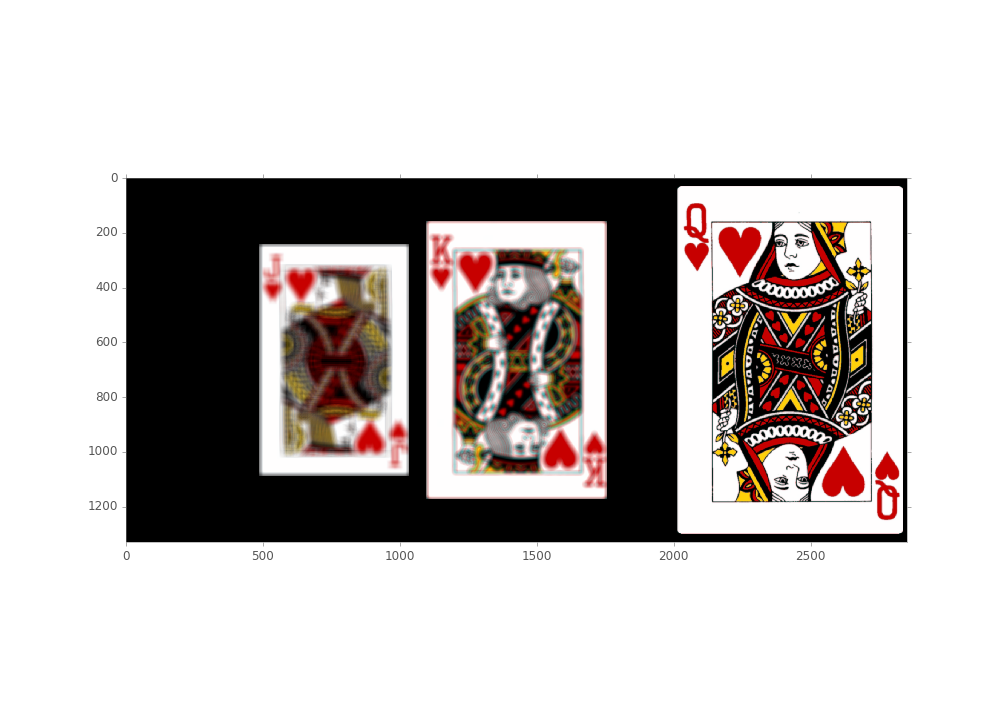

Magnifications: [-0.02474227 -0.03092784 -0.02061856]


In [50]:
iSelect = None
interact(show_stack, hdffile=get_hdf5files_list(),  what={'Images':show_image_stack,
               'PSF Grids':show_psf_stack, 'CR IMG int.':show_cr_img_inter_stack});

In [51]:
ln.close()

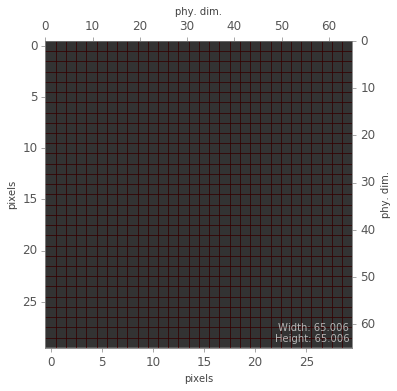

In [174]:
hdffile = get_hdf5files_list()[-1]
imgdir = os.path.join(os.getcwd(), 'data', 'imgstack')
hdffile = os.path.join(imgdir, hdffile)
f = hdf.File(hdffile, 'r')
stackLen = len(f['data'])
pixsize = 1000*f.attrs['img_sim_pixel_size'] # microns
sgrp = f['data/000']
dset = sgrp['image']
#gm.show_around(dset[...], pixX=30, pixY=30, pixSize=pixsize, pixGrid=True)

### Paraxial double lens - angular sweep stack

In [8]:
loadStoredCopy = True
if loadStoredCopy:
    storedLens = "paraxialDoubleLens24mmFiniteConj_mp1_cardinalsDrawnWdRotAbtENPP.zmx"
    storedLensPath = os.path.join(zmxdir, storedLens)
    ln.zLoadFile(storedLensPath)
else:
    ln.zGetRefresh()

In [9]:
ln.ipzGetLDE()

SURFACE DATA SUMMARY:

Surf     Type         Radius      Thickness                Glass      Diameter          Conic   Comment
 OBJ TILTSURF              -            990                                500              -
   1 STANDARD       Infinity             10                                  0              0 dummy 2 c rays
   2 STANDARD       Infinity             16                                  0              0 Move to ENPP
   3 COORDBRK              -            -16                                  -              - Lens tilt CB
   4 STANDARD       Infinity             16                                  0              0 dummy
   5 STANDARD       Infinity            -16                                2.4              0 H
   6 STANDARD       Infinity             -8                                  0              0 dummy
   7 STANDARD       Infinity              8                                2.4              0 F
   8 STANDARD       Infinity             16                     

In [10]:
#ln.push

In [11]:
for i in range(ln.zGetNumSurf()):
    if ln.zGetComment(i) == 'EXPP':
        break
print('Exit pupil surface number is:', i)

Exit pupil surface number is: 14


In [12]:
# Insert Zernike surface at the EX
zernSurfNum = i  # the new position of the EXPP surface will be i+1
ln.zInsertSurface(surfNum=zernSurfNum)
ln.zSetSurfaceData(surfNum=zernSurfNum, code=ln.SDAT_TYPE, value='SZERNPHA')

'SZERNPHA'

In [13]:
#ln.push

In [14]:
# Set Zernike surface's initial properties
maxTermCol = 1
maxTerm = 11  # upto primary spherical aberration
normRadiusCol = 2
normRadius = ln.zGetPupil().EXPD/2
priSphCol = 2 + 11   # 2 cols for maxTerm and normRadius plus 11th zernike term

ln.zSetExtra(zernSurfNum, maxTermCol, maxTerm)
ln.zSetExtra(zernSurfNum, normRadiusCol, normRadius)
# we will set the aberration terms later

5.0

In [15]:
# source bitmap image is assumed to be in the IMAFiles folder
usr = os.path.expandvars("%userprofile%")
IMAdir = os.path.join(usr, 'Documents\Zemax\IMAFiles')
image = 'king.jpg'
imgfilename = os.path.join(IMAdir, image)
imgfilename

'C:\\Users\\Indranil\\Documents\\Zemax\\IMAFiles\\king.jpg'

In [16]:
ypix, xpix, _ = imread(imgfilename).shape
ypix, xpix

(1010L, 656L)

In [17]:
h = 89.0
ho = gm.get_cardinal_points(ln).Ho

detDat = gm.get_detector_settings(h=h, xpix=xpix, ypix=ypix, fl=24, xfield=70, 
                                  umid=ho+990, 
                                  unear=ho+790, 
                                  ufar=ho+1190)
detPixelSize, detXPixels, detYPixels = detDat
detPixelSize, detXPixels, detYPixels

(0.0017812641832943904, 3375, 1565)

In [18]:
cb1 = 3

In [19]:
h = 89.0
ln.zSetExtra(zernSurfNum, priSphCol, 0.126)
#detPixelSize, detXPixels, detYPixels = 0.0021668560298652812, 2853, 1330

detPixelSize, detXPixels, detYPixels = 0.00178, 3375, 2320  # for ±5° tilt about x

###### TO DO

1. Function to determine the appropriate tilts


In [20]:
#ln.push

In [21]:
# In the setup of the lens, it is expected that the first surface in the LDE (OBJ or 
# surfNum=0) is the object surface, following which is the dummy surface for rendering 
# incoming rays close to the lens (in physical space). Therefore the PHYSICAL distance
# between the object surface and the vertex of the lens' left most surface is equal to
# the thickness of the OBJ surface and the dummy surface in the LDE.

# Settings for every composed image frame with object at 3 different depths 
# from the lens
dummySurfThick = ln.zGetThickness(surfNum=1)

# fetch the dummySurfThick from the 

objsurfthick = [1000-dummySurfThick, 800-dummySurfThick, 1200-dummySurfThick] 
objarr = ['king.jpg', 'queen.jpg', 'jack.jpg']
fldarr = [1, 4, 5]


# settings for generation of the focal-sweep stack of images
focalLength = 24
numOfImagesInStack = 3

# function to generate the range of angular shifts of the image plane along the optical 
# axis relative to the base position (position at which the middle object is
# in geometrical focus)
angDelta = gm.get_lens_plane_tilts(uo=1000, nearObj=800, farObj=1200, fl=focalLength, 
                                     num=numOfImagesInStack) #[-1]
if not isinstance(angDelta, list):
    angDelta = list((angDelta,))


# function to generate the image stack and store in an HDF5 container

# arguments to the function zSetImageSimulationsSettings()

X2, X4, X8, X16, X32 = 1, 2, 3, 4, 5  # oversampling
RGB = 0                               # Wavelength
S32by32, S64by64 = 1, 2               # Pupil/Image Sampling
AB_NONE, AB_GEO, AB_DIFF = 0, 1, 2    # Aberration

hdffileFull = gm.focal_stack_lens_tilts(ln, cb1=cb1, tiltX=angDelta, 
                                        objsurfthick=objsurfthick, 
                                        objarr=objarr, fldarr=fldarr, 
                                        objht=h, over=0, 
                                        pupsam=S64by64, imgsam=S64by64, 
                                        psfx=5, psfy=5, 
                                        pixsize=detPixelSize, 
                                        xpix=detXPixels, ypix=detYPixels,
                                        aberr=AB_NONE, psfGrid=False,
                                        timeout=600, verbose=True)


os.path.split(hdffileFull)[-1]

Time: 0:00:00. Starting image simulation for tiltAbtX = -5.0000
Time: 0:08:01. Image sim of data type img for obj king.jpg for obj thick 990.00 completed!
Time: 0:16:16. Image sim of data type img for obj queen.jpg for obj thick 790.00 completed!
Time: 0:24:07. Image sim of data type img for obj jack.jpg for obj thick 1190.00 completed!
Traced chief-ray intersects.
Time: 0:24:09. Starting image simulation for tiltAbtX = 0.0000
Time: 0:31:55. Image sim of data type img for obj king.jpg for obj thick 990.00 completed!
Time: 0:39:50. Image sim of data type img for obj queen.jpg for obj thick 790.00 completed!
Time: 0:47:28. Image sim of data type img for obj jack.jpg for obj thick 1190.00 completed!
Traced chief-ray intersects.
Time: 0:47:30. Starting image simulation for tiltAbtX = 5.0000
Time: 0:55:24. Image sim of data type img for obj king.jpg for obj thick 990.00 completed!
Time: 1:03:30. Image sim of data type img for obj queen.jpg for obj thick 790.00 completed!
Time: 1:11:18. Imag

'lens_tilt_focal_stack_2016_01_15_23_37.hdf5'

#### View data and process

Magnifications: [-0.02695257 -0.03287502 -0.0229783 ]


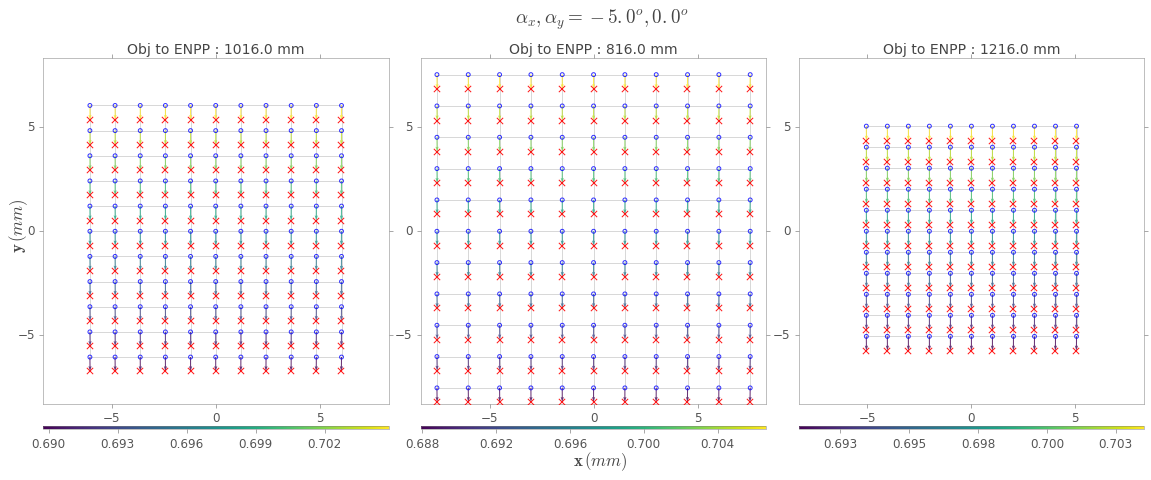

In [31]:
plt.close('all') # to close all open figures ... especially important if the notebook environment is on
gm.iSelect = None  # Hack for now

interact(gm.show_stack, hdffile=gm.get_hdf5files_list(),  
         what={'Images': gm.show_image_stack,
               'PSF Grid': gm.show_psf_stack, 
               'CR IMG int.': gm.show_cr_img_inter_stack,});

In [8]:
# if %matplotlib notebook backend is on 
gc.collect()
plt.close('all')

Perform image registration

In [7]:
# register the most recent data
hdffile = gm.get_hdf5files_list()[-1]
imgdir = os.path.join(os.getcwd(), 'data', 'imgstack')
hdffile = os.path.join(imgdir, hdffile)

gm.register_data(hdffile)

OK


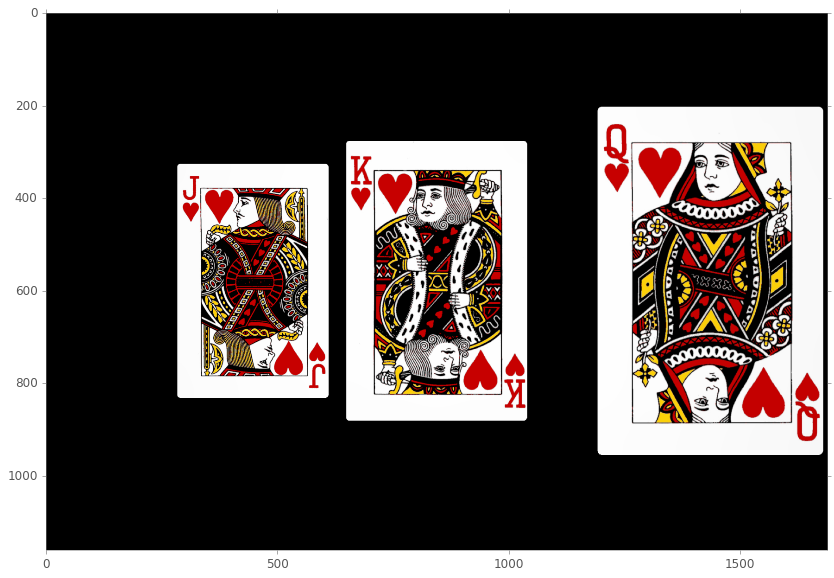

In [10]:
plt.close('all') # to close all open figures ... especially important if the notebook environment is on
gm.iSelect = None  # Hack for now

interact(gm.show_stack, hdffile=gm.get_hdf5files_list(),  
         what={'Rect. Images': gm.show_registered_image_stack,
               'Rect. PSF Grid': gm.show_registered_psf_stack});